<a href="https://colab.research.google.com/github/PedroAugustMendes/Modelo-de-classifica-o-para-an-lise-de-cr-dito/blob/main/KNNCreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***ANÁLISE DE POSSÍVEIS FRAUDE EM CARTÃO DE CRÉDITO***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as LabelEncoder

In [2]:
#Fazendo a importação do DataFrame
df = pd.read_csv("/content/sample_data/creditcard.csv")
#Exibindo a dimensão dos dados
print("Dimensão dos dados")
print("Linhas: (Instâncias) | Colunas: (Atributos) ", df.shape)


Dimensão dos dados
Linhas: (Instâncias) | Colunas: (Atributos)  (11959, 31)


In [3]:
 #Exibindo as primeiras 20 linhas da base de dados
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [4]:
#Verificando a quantidade de elementos (NaN) inválidos estão presentes na base de dados
dados_faltantes = (df.isnull().sum)
print(dados_faltantes)

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
11954  False  False  False  False  False  False  False  False  False  False   
11955  False  False  False  False  False  False  False  False  False  False   
11956  False  False  False  False  False  False  False  False  False  False   
11957  False  False  False  False  False  False  False  False  False  False   
11958  False  False  False  False  False  False  False  False  False 

In [5]:
#Verificando onde os dadso estão faltando
atributos_nulos = df.isnull()
print(atributos_nulos.head(10))

    Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False  False  False  False  False  False  False  False  False  ...   
3  False  False  False  False  False  False  False  False  False  False  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   
5  False  False  False  False  False  False  False  False  False  False  ...   
6  False  False  False  False  False  False  False  False  False  False  ...   
7  False  False  False  False  False  False  False  False  False  False  ...   
8  False  False  False  False  False  False  False  False  False  False  ...   
9  False  False  False  False  False  False  False  False  False  False  ...   

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class  
0  False  False  False  False  False  False 

In [6]:
#Criando um novo DataFrame para comparar a DB com e sem valores Nan.
df_2 = df.dropna()
df_2.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [7]:
#Comparando as Db - (Linhas, Colunas)
df.shape

(11959, 31)

In [8]:
df_2.shape

(11958, 31)

Após esta análise, percebe-se que na base de dados original só havia uma linha contendo atributos não válidos. Logo, após a sua retirada, será possível aproveitar-nos dos 31 atributos disponíveis e de uma quantidade considerável de instância para um modelo de treinamento eficaz.


In [9]:
df_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,11958.0,8008.940458,6203.516081,0.000000,2542.000000,6661.500000,12378.000000,20638.000000
V1,11958.0,-0.216356,1.583920,-27.670569,-0.978957,-0.340925,1.161229,1.960497
V2,11958.0,0.277139,1.308931,-34.607649,-0.261503,0.256551,0.883785,9.092123
V3,11958.0,0.889520,1.331879,-22.804686,0.417182,0.951225,1.613701,4.101716
V4,11958.0,0.282689,1.478195,-4.657545,-0.621757,0.213050,1.159181,11.927512
V5,11958.0,-0.086537,1.191815,-32.092129,-0.688117,-0.183779,0.346298,34.099309
V6,11958.0,0.140021,1.306334,-23.496714,-0.622575,-0.146773,0.508444,21.393069
V7,11958.0,-0.121902,1.153939,-26.548144,-0.591325,-0.094697,0.431693,34.303177
V8,11958.0,-0.048722,1.246875,-23.632502,-0.185271,0.013642,0.267658,5.499963
V9,11958.0,0.911402,1.192241,-7.175097,0.196736,0.894775,1.588965,10.392889


In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11958 entries, 0 to 11957
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11958 non-null  int64  
 1   V1      11958 non-null  float64
 2   V2      11958 non-null  float64
 3   V3      11958 non-null  float64
 4   V4      11958 non-null  float64
 5   V5      11958 non-null  float64
 6   V6      11958 non-null  float64
 7   V7      11958 non-null  float64
 8   V8      11958 non-null  float64
 9   V9      11958 non-null  float64
 10  V10     11958 non-null  float64
 11  V11     11958 non-null  float64
 12  V12     11958 non-null  float64
 13  V13     11958 non-null  float64
 14  V14     11958 non-null  float64
 15  V15     11958 non-null  float64
 16  V16     11958 non-null  float64
 17  V17     11958 non-null  float64
 18  V18     11958 non-null  float64
 19  V19     11958 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

Criando um histograma a partir do DataFrame df_2.

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

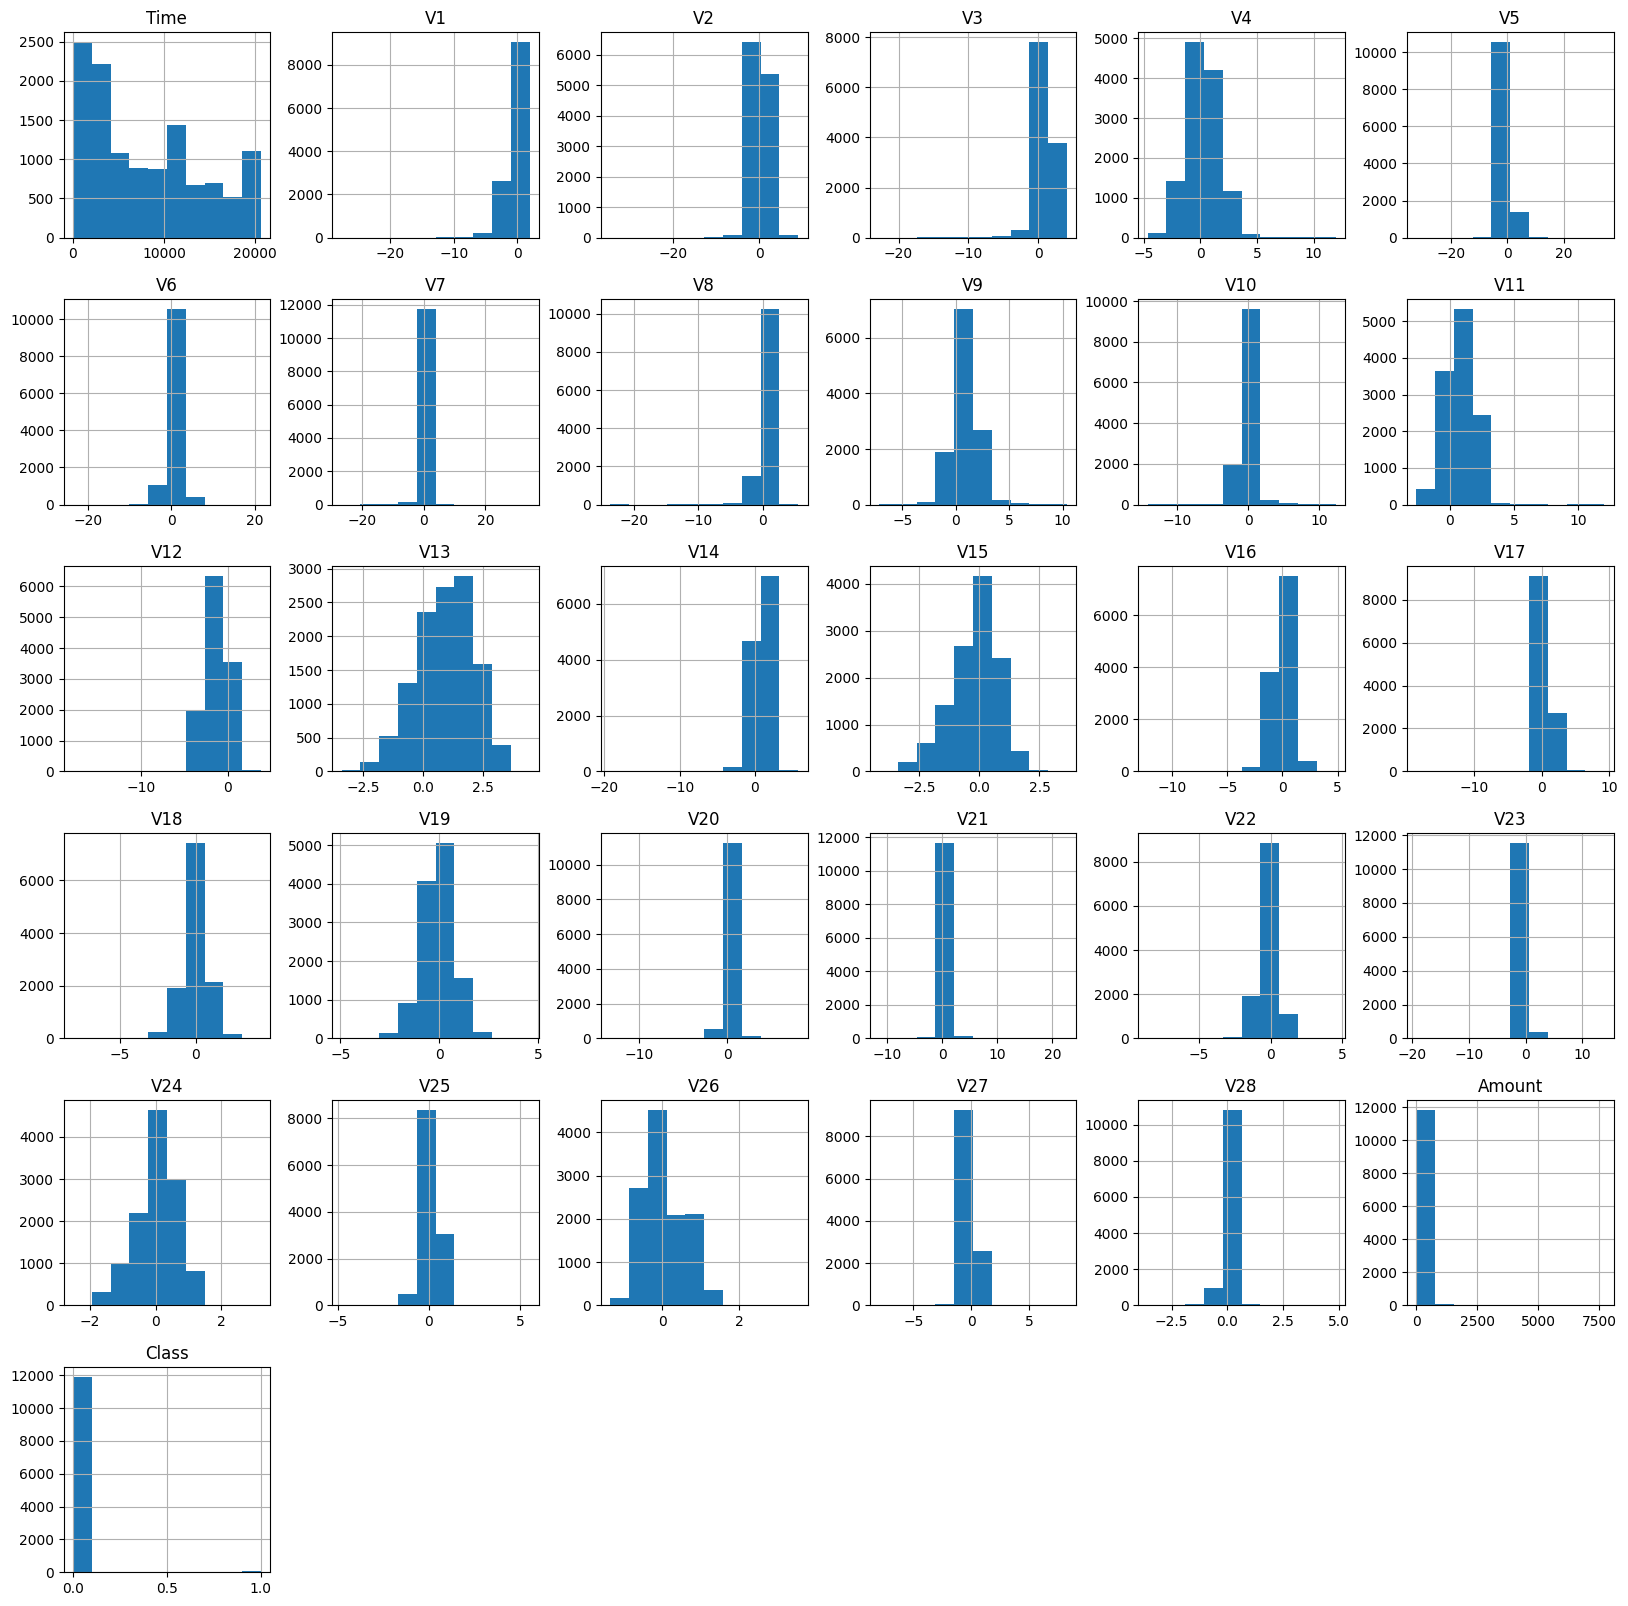

In [11]:
df_2.hist(figsize = (20,20)) #Cada aba do histograma terá 5 polegadas por 5

In [12]:
import sklearn.preprocessing as StandardScanler
escala = LabelEncoder.StandardScaler()

In [13]:
X = pd.DataFrame(escala.fit_transform(df_2.drop(["Class"],axis = 1)))
y = df_2.Class

In [14]:
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.291086,-0.721942,-0.267344,1.236520,0.741114,-0.211269,0.246783,0.313288,0.118236,-0.459335,...,0.397472,0.046989,0.688931,-0.151908,0.084237,0.055299,-0.448744,0.309167,-0.081634,0.489607
1,-1.291086,0.889105,-0.008396,-0.542895,0.111942,0.122973,-0.170240,0.037351,0.107332,-0.978725,...,-0.159102,-0.178847,-0.773728,0.267145,-0.603615,0.145265,0.112190,-0.042715,0.055328,-0.334733
2,-1.290925,-0.721025,-1.235642,0.663518,0.065684,-0.349617,1.271151,0.791551,0.237722,-2.034955,...,0.872551,0.336871,1.477054,1.866333,-1.194505,-1.007081,-0.359677,-0.157185,-0.229781,1.774619
3,-1.290925,-0.473476,-0.353254,0.678373,-0.775289,0.063963,0.847585,0.311564,0.341795,-1.927900,...,-0.400412,-0.050972,0.253946,-0.309916,-2.016824,1.263595,-0.507175,0.134300,0.234233,0.343063
4,-1.290764,-0.594674,0.458865,0.494959,0.081417,-0.269060,-0.033759,0.619506,-0.177901,-0.078563,...,0.670345,0.056651,1.519504,-0.205307,0.209943,-0.723817,0.782438,0.521134,0.822610,0.042849
5,-1.290764,-0.132342,0.522115,0.188906,-0.305075,0.425859,-0.129948,0.518336,0.247859,-1.241473,...,0.108423,-0.159774,-0.647895,0.014469,-0.657017,-0.786194,0.076613,0.606109,0.309352,-0.329235
6,-1.290442,0.912971,-0.104010,-0.633830,0.622355,0.233618,0.101577,0.101173,0.104213,-0.374472,...,-0.420547,-0.115648,-0.186496,-0.238247,-1.348004,1.502910,-0.570048,0.064647,0.018744,-0.321829
7,-1.289958,-0.270173,0.871606,0.138802,-0.524234,0.868855,0.220548,1.076821,-3.014977,-0.248305,...,-0.311331,2.182444,-1.375036,0.180500,-1.127589,-1.211146,-0.203934,-2.999984,-4.155932,-0.120919
8,-1.289958,-0.428026,0.006890,-0.752887,-0.374943,2.312651,2.741983,0.426424,0.721679,-1.093322,...,0.052449,-0.013009,-0.182318,-0.337446,1.681654,0.625089,-0.796054,0.008461,0.544113,0.173067
9,-1.289636,-0.076968,0.643647,0.116266,-0.341564,0.491622,-0.296094,0.670328,0.094849,-1.382437,...,0.314635,-0.201858,-0.765877,-0.172331,-0.680054,-0.406449,0.055750,0.587286,0.316991,-0.329178


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

#Aplicando o algoritmo KNN para classificação nas análises de possíveis fraudes em cartões de crédito

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))

[[3576    1]
 [   4    7]]


In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3577
         1.0       0.88      0.64      0.74        11

    accuracy                           1.00      3588
   macro avg       0.94      0.82      0.87      3588
weighted avg       1.00      1.00      1.00      3588



In [20]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

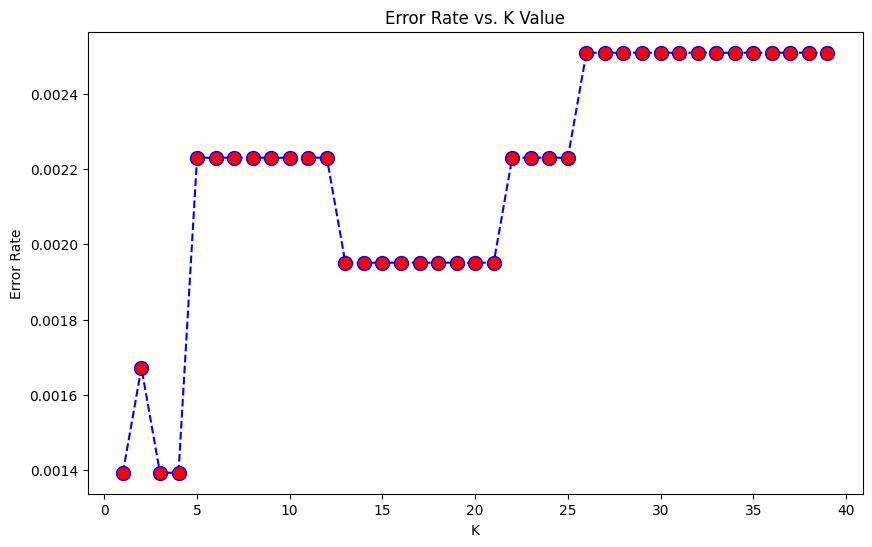

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH k=1


[[3576    1]
 [   4    7]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3577
         1.0       0.88      0.64      0.74        11

    accuracy                           1.00      3588
   macro avg       0.94      0.82      0.87      3588
weighted avg       1.00      1.00      1.00      3588



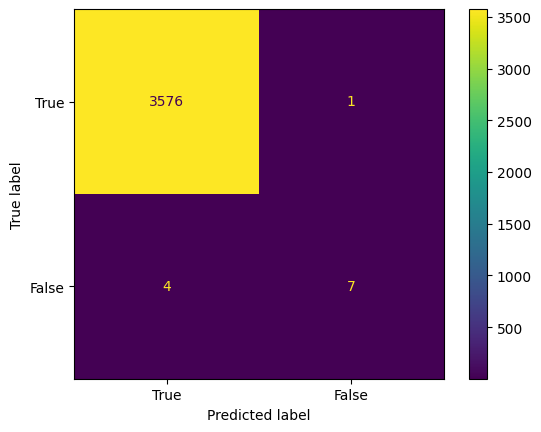

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, pred)
vis = ConfusionMatrixDisplay(confusion_matrix = conf_matrix,display_labels = [True,False])
vis.plot()
plt.grid(False)
plt.show()